In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
import tensorflow as tf

In [37]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [39]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
model = Sequential()
model.add(Dense(10, input_dim=13))
model.add(Activation('relu'))
model.add(Dense(5))
model.add(Activation('relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                140       
                                                                 
 activation_6 (Activation)   (None, 10)                0         
                                                                 
 dense_12 (Dense)            (None, 5)                 55        
                                                                 
 activation_7 (Activation)   (None, 5)                 0         
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.4))
history = model.fit(x_train, y_train, epochs=500, batch_size=64, verbose=0)

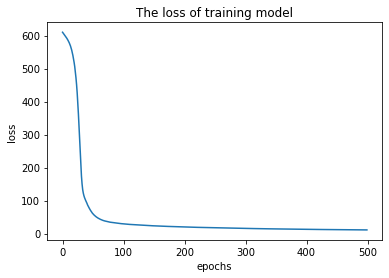

In [42]:
history.history
plt.plot(history.history['loss'])
plt.title('The loss of training model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [43]:
predictions = model.predict(x_test)

In [44]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 998us/step - loss: 19.6823


19.68230438232422